# Exploring Terms in the Encyclopaedia Britannica


### Loading the necessary libraries

In [6]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [9]:
def create_graph_df(df, num):

    graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='related_terms', edge_attr=True)
    return graph_df
   

In [99]:
def explore_a_term(term):
    term_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains(term)]
    G = create_graph_df(term_df, 50)
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=8, alpha=1)
    plt.axis('off')
    plt.show()

## We have dataframe with these information

- definition:           Definition of the article
- edition_num:          1,2,3,4,5,6,7,8
- header:               Header of the page's article                                  
- num_article_words:    Number of words per article
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- related_terms:        Related articles (see X article)  
- source_text_file:     File Path of the XML file from which the article belongs       
- term:                 Article name                            
- term_id_in_page:      Number of article in the page     
- page_num:                 Page Number
- title:               Title of the Volume
- type_article:            Type of Page [Full Page| Topic| Mix | Articles]                                       
- year:                 Year of the Volume
- volume:               volume (e.g. 1)
- letters:              leters of the volume (A-B)
- edition_num:           1,2,3,4,5,6,7,8


### 1. Load dataframe from JSON file

In [10]:
df = pd.read_json('./results_NLS/results_eb_1_edition_postprocess_dataframe', orient="index") 

In [11]:
df

,definition,edition_num,header,letters,num_article_words,page_num,place,related_terms,source_text_file,term,term_id_in_page,title,type_article,volume,year
0,n*s-f 7^' v L i A j J ^ /^^W / ; H:;^’ J }r-r£...,1,iiiubnsfvnsfv,A-B,58,2,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808273...,IIIUBNSFVNSFV,0,"Encyclopaedia Britannica; or, A dictionary of ...",FullPage,1,1771
1,S :u -I >;J .1 M U a C V',1,**■*,A-B,10,8,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808281...,FIRSTARTICLE,0,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
10,"the name of two rivers, one in the country of ...",1,EncyclopaediaBritannica,A-B,19,15,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808290...,AADE,3,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
100,"of heresy, the solemn recantation of any doftr...",1,ABLABR,A-B,12,19,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808295...,ABJURATION,9,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
1000,"oc Alces, in zoology, the trivial name of a sp...",1,ALcALC,A-B,22,109,Edinburgh,[CERVUS],nls-data-encyclopaediaBritannica/alto/18808412...,ALCE,4,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"in optics, a lens convex on one side, and conc...",1,MENMEIt,M-Z,14,194,Edinburgh,[OPTICS],nls-data-encyclopaediaBritannica/alto/14480694...,MENISCUS,16,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9996,"in botany, a genus of the dioecia do-' decandr...",1,MENMEIt,M-Z,42,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENISPEMUM,17,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9997,"a fed! of baptrlls in Holland, so called from ...",1,MENMEIt,M-Z,96,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENNONITES,18,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9998,"the Greek calendar, in which the lives of the ...",1,MENMEIt,M-Z,28,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENOLOGY,19,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771


### 2. Related Terms

### 2.1 Selecting just the volumes 1771

In [14]:
df_1771_vol1 = df[(df['year'] == 1771) & (df['volume'] == 1) ]


### 2.2 Counting the number of terms

**Remember**: A term can appear in more than once  per eddition. 

In [15]:
df_1771_vol1.count()

definition           4204
edition_num          4204
header               4204
letters              4204
num_article_words    4204
page_num             4204
place                4204
related_terms        4204
source_text_file     4204
term                 4204
term_id_in_page      4204
title                4204
type_article         4204
volume               4204
year                 4204
dtype: int64

**Note**: This means that we have 4204 terms in 1771

### 3. Filtering the terms that have related terms

We are interested to explore the relations between terms, so we are going to filter out all these terms wich do not have related terms

In [16]:
df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

We need to "explode" teh column "related_terms", so we have a row, per related term. 

So, lets imagine that we have the term "X" and its related terms are "Y" and "Z". Originally we would a row, in which the related_terms colum value would be ["X", "Y"]. 

After exploding the related_terms colum, now we are going to have two rows with exactly the same information, but in one row, we will have "Y" as the related term, and in another "Z". 

In [17]:
df_related_1771_vol1=df_related_1771_vol1.explode('related_terms')

In [18]:
df_related_1771_vol1

,definition,edition_num,header,letters,num_article_words,page_num,place,related_terms,source_text_file,term,term_id_in_page,title,type_article,volume,year
19,"in ichthyology, a barbarous name of the zeus v...",1,EncyclopaediaBritannica,A-B,19,15,Edinburgh,ZEUS,nls-data-encyclopaediaBritannica/alto/18808290...,ABACATUAIA,12,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
20,"AY, a barbarous name of a species of the pfitt...",1,EncyclopaediaBritannica,A-B,14,15,Edinburgh,PSITTACUS,nls-data-encyclopaediaBritannica/alto/18808290...,ABAC,13,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
22,See ABACUS.,1,EncyclopaediaBritannica,A-B,2,15,Edinburgh,ABACUS,nls-data-encyclopaediaBritannica/alto/18808290...,ABACISCUS,15,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
36,"in botany, a fynonime of the calycanthus prtec...",1,ABAABB,A-B,22,16,Edinburgh,CALYCANTHUS,nls-data-encyclopaediaBritannica/alto/18808291...,ABAI,8,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
37,See ABASED.,1,ABAABB,A-B,2,16,Edinburgh,ABASED,nls-data-encyclopaediaBritannica/alto/18808291...,ABAISSE,9,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,"a kind of ferum that remains behind, after the...",1,BUTBUT,A-B,17,828,Edinburgh,PINGUICULA,nls-data-encyclopaediaBritannica/alto/18809347...,BUTTERMILK,7,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
4237,"an article of dress, serving to fallen cloaths...",1,BUTBUT,A-B,193,828,Edinburgh,BUD,nls-data-encyclopaediaBritannica/alto/18809347...,BUTTON,10,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
4237,"an article of dress, serving to fallen cloaths...",1,BUTBUT,A-B,193,828,Edinburgh,BUTTON,nls-data-encyclopaediaBritannica/alto/18809347...,BUTTON,10,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
4244,"in ornithology, the English name of several sp...",1,BUXBYZ,A-B,14,829,Edinburgh,FAUCO,nls-data-encyclopaediaBritannica/alto/18809348...,BUZZARD,6,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771


### 4.Creating a graph with the first 20 terms

We are going to select the first 20 elements, and visualize their related terms. 

In [19]:

graph_df = create_graph_df(df_related_1771_vol1, 50)


Here are the 20 terms stored in a list

In [20]:
list_terms= df_related_1771_vol1[["term"]].head(n=20).values.tolist()
list_terms_update=[]
for i in list_terms:
    list_terms_update.append(i[0])
list_terms_update

['ABACATUAIA',
 'ABAC',
 'ABACISCUS',
 'ABAI',
 'ABAISSE',
 'ABALIENATION',
 'ABARTICULATION',
 'ABARTICULATION',
 'ABATEMENT',
 'ABAYANCE',
 'ABBAT',
 'ABBATIS',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBROCHMENT',
 'ABCDARIA',
 'ABDELAVI']

And now lets create a network graph for displaying those relationships

/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/mypython3/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


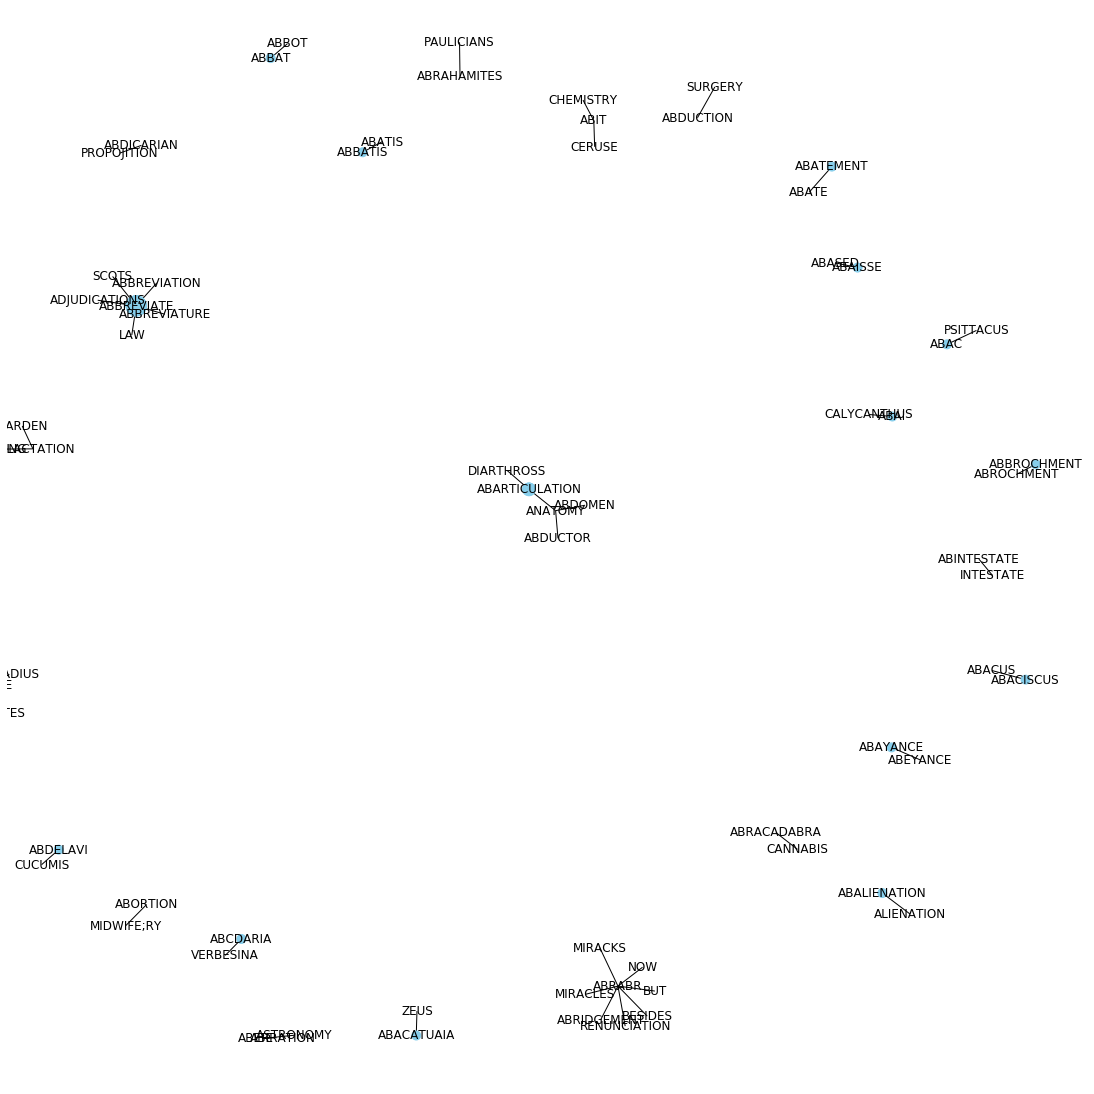

In [22]:
term_size = [graph_df.degree(t) * 80 for t in list_terms_update]

plt.figure(figsize=(15,15))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, nodelist= list_terms_update, node_size= term_size, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.axis('off')
plt.show()

### 5.Exploring the relations of one term - ABACISCUS

We are going to use the term ABACISCUS, and visualize its related terms in a graph. 

In [26]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,definition,edition_num,header,letters,num_article_words,page_num,place,related_terms,source_text_file,term,term_id_in_page,title,type_article,volume,year
22,See ABACUS.,1,EncyclopaediaBritannica,A-B,2,15,Edinburgh,ABACUS,nls-data-encyclopaediaBritannica/alto/18808290...,ABACISCUS,15,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771


In [41]:
G = create_graph_df(ABACISCUS_df, 50)

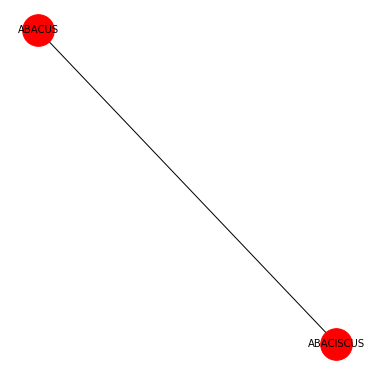

In [66]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=10, alpha=1)
plt.axis('off')
plt.show()

### 5.Exploring the terms with most relations.

Now lets get the 10 terms with most relations. For that, we have to group the dataframe by terms, and create an extra colum, with the count. 

In [87]:
rt=df_related_1771_vol1.groupby(['term']).size().rename('count').reset_index()
rt

,term,count
0,A,2
1,ABAC,1
2,ABACATUAIA,1
3,ABACISCUS,1
4,ABAI,1
...,...,...
892,PARTILF,2
893,POG,1
894,RCTIC,1
895,TA,4


And now lets get the 10 most repeated terms

In [92]:
rt.nlargest(10, 'count')

,term,count
667,BBTHEEPISTLEOF,101
796,BOTANY,55
359,ANAI,49
795,BOTANV,30
380,ANCZAKRICHARIVERORPODOIIAWHICHFALLSINFOAND,23
891,OARCHITECTURE,23
506,ARITHMETICK,21
814,BRANDY,16
505,ARIRHRS,15
559,ASTRONOMY,15


Lets select ASTRONOMY term

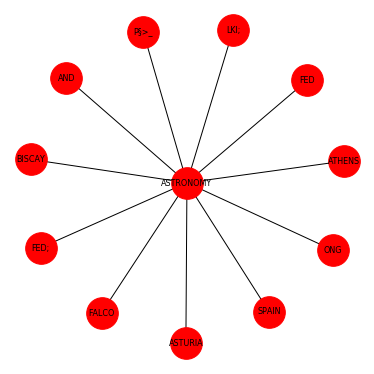

In [100]:
explore_a_term("ASTRONOMY")

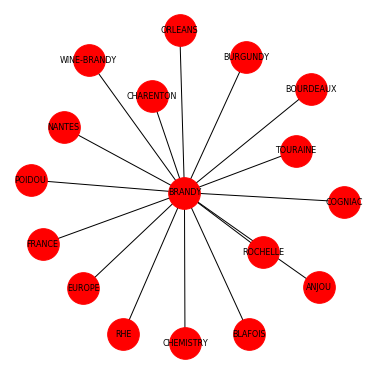

In [104]:
explore_a_term("BRANDY")

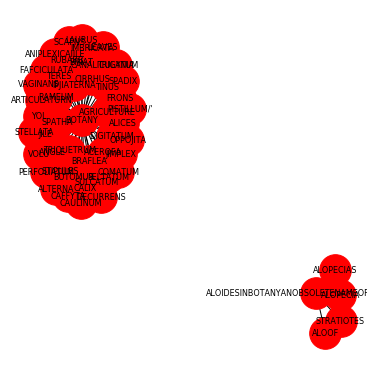

In [105]:
explore_a_term("BOTANY")